In [1]:
import keyword
import pytest
import warnings
import hashlib

### Übung 4 - Build-in DS und Hashing

#### Aufgabe 1: Build-in DataStructures
Bauen Sie auf der "In_Class_Uebung_4" - Aufgabe 1 auf. Dort haben Sie bereits alle einzel-Informationen. erstellt.  

Welche Datenstrukturen sind geeignet um folgende Informationen sinnvoll abzubilden?

Optionen: 
- tuple
- list
- dict
- set

**Diesmal ist es erlaubt, Datenstrukturen zu kombinieren**

**Hinweis:** *Alle DHBWs:* {DHBWMannheim, DHBWLoerrach, DHBWKarlsruhe }

In [2]:
# a) Alle DHBWs mit ihren WI-Studiengängen und Lat und Long koordinaten
# [ 5 points]

"""
3d Dictionary mit DHBWs, ihren WI-Studiengängen und Lat und Long Koordinaten
Syntax: dict{DHBW: dict{WI-Studiengänge: set{Name}, Lat,Long: tuple(Lat, Long)}}
"""

DHBW_DATA = {
    "DHBW Mannheim":    {"WI-Studiengänge": {"Application Management", "Data Science", "E-Government", "E-Health", "International Management for Business and Information Technology","Sales and Consulting", "Software Engeneering"},
                        "Lat,Long":     (49.473807, 8.534769)},
    "DHBW Karlsruhe":   {"WI-Studiengänge": {"Data Science", "Sales and Consulting", "Software Engeneering"}, 
                         "Lat,Long":    (49.026392, 8.385331)},
    "DHBW Loerrach":    {"WI-Studiengänge": {"Application Management", "Data Science"},
                         "Lat,Long":    (47.61688009169863, 7.676269402510667)}}


#### Aufgabe 2: Operationen auf Datenstrukturen 
(basierend auf Aufgabe 1)

In [3]:
# a) Welche WI Studiengänge kann ich in Mannheim studieren? Die Antwort ist durch auslesen von 
#    all_dhbws_with_programmes_and_coordinates aus 1a zu bestimmen (ggf ist diese anzupassen)
# [4 points]
print("Verfügbare Studiengänge in Mannheim:")
print(", ".join(DHBW_DATA["DHBW Mannheim"]["WI-Studiengänge"]))


Verfügbare Studiengänge in Mannheim:
E-Government, E-Health, International Management for Business and Information Technology, Application Management, Software Engeneering, Sales and Consulting, Data Science


In [4]:
# b) Wie viele WI Studiengänge gibt es an DHBWs? (bestimme aus beliebiger Datenstruktur aus 1) oder 2)
# [4 points]

print("Studiengänge pro DHBW:")
individual_programmes = set()
for i, (dhbw, info) in enumerate(DHBW_DATA.items()):
    individual_programmes = info["WI-Studiengänge"] if i == 0 else individual_programmes.union(info["WI-Studiengänge"])
    print("{}: {}".format(dhbw, len(info["WI-Studiengänge"])))
print("Summe der individuellen Studiengänge: {}".format(len(individual_programmes)))


Studiengänge pro DHBW:
DHBW Mannheim: 7
DHBW Karlsruhe: 3
DHBW Loerrach: 2
Summe der individuellen Studiengänge: 7


In [5]:
# c) gebe die DHBWs sortiert nach Längengrad aus (bestimme aus beliebiger Datenstruktur aus 1) / 2)
# [ 4 points]

# die sorted Funktion nimmt als Parameter eine Funktion, die auf jedes Element angewendet wird, 
# um den Wert zu bestimmen. nach dem sortiert werden soll; (Ähnlch wie wir es bereits beim messen 
# der Worst-Case Complexity anderen Übungen gesehen haben)

print("DHBWs sortiert nach Längengrad:")
for lang in sorted(DHBW_DATA, key=lambda x: DHBW_DATA[x]["Lat,Long"][1]):
    print("{}: {}".format(lang, DHBW_DATA[lang]["Lat,Long"][1]))


DHBWs sortiert nach Längengrad:
DHBW Loerrach: 7.676269402510667
DHBW Karlsruhe: 8.385331
DHBW Mannheim: 8.534769


In [6]:
# d) Welche Studiengänge kann man in Lörrach und Karlsruhe studieren 
#    (bestimme aus beliebiger Datenstruktur aus 1) / 2). Das Ergebnis muss vollständig und eindeutig sein.
# [4 points]

print("Studiengänge in Lörrach oder Karlsruhe: \t\t\t -> Vereinigungsmenge")
for programm in DHBW_DATA["DHBW Loerrach"]["WI-Studiengänge"].union(DHBW_DATA["DHBW Karlsruhe"]["WI-Studiengänge"]):
    print("\t- {}".format(programm), end="\n")

print("Studiengänge in Lörrach und Karlsruhe: \t\t\t\t -> Schnittmenge")
for programm in DHBW_DATA["DHBW Loerrach"]["WI-Studiengänge"].intersection(DHBW_DATA["DHBW Karlsruhe"]["WI-Studiengänge"]):
    print("\t- {}".format(programm), end="\n")

print("Studiengänge in Lörrach oder Karlsruhe aber nicht in beiden: \t -> Symmetrische Differenz")
for programm in DHBW_DATA["DHBW Karlsruhe"]["WI-Studiengänge"].symmetric_difference(DHBW_DATA["DHBW Loerrach"]["WI-Studiengänge"]):
    print("\t- {}".format(programm), end="\n")

print("Studiengänge in Lörrach aber nicht Karlsruhe: \t\t\t -> Differenz")
for programm in DHBW_DATA["DHBW Loerrach"]["WI-Studiengänge"].difference(DHBW_DATA["DHBW Karlsruhe"]["WI-Studiengänge"]):
    print("\t- {}".format(programm), end="\n")

print("Studiengänge in Karlsruhe aber nicht Lörrach: \t\t\t -> Differenz")
for programm in DHBW_DATA["DHBW Karlsruhe"]["WI-Studiengänge"].difference(DHBW_DATA["DHBW Loerrach"]["WI-Studiengänge"]):
    print("\t- {}".format(programm), end="\n")


Studiengänge in Lörrach oder Karlsruhe: 			 -> Vereinigungsmenge
	- Application Management
	- Software Engeneering
	- Sales and Consulting
	- Data Science
Studiengänge in Lörrach und Karlsruhe: 				 -> Schnittmenge
	- Data Science
Studiengänge in Lörrach oder Karlsruhe aber nicht in beiden: 	 -> Symmetrische Differenz
	- Software Engeneering
	- Sales and Consulting
	- Application Management
Studiengänge in Lörrach aber nicht Karlsruhe: 			 -> Differenz
	- Application Management
Studiengänge in Karlsruhe aber nicht Lörrach: 			 -> Differenz
	- Software Engeneering
	- Sales and Consulting


#### Aufgabe 3: Hashing
Idee dieser Aufgabe ist es, nachzubilden wie ein set "under the hood" funktioniert.  

Schreiben Sie hierzu eine Hash-Tabellen Klasse, welche Strings speichert. Die Hash-keys sollen anhand der Unicodes der ersten beiden Buchstaben berechnet werden. Dabei besteht jeder Unicode aus einer zweistelligen Integer. Die Unicodes sollen simpel "hintereinander gesetzt werden". Nutzen Sie die folgende Skeletton-Vorlage:  
[7 points]

##### Kritische Würdigung zu `HashTable.calculate_has_value()`
Zur Berechnung des Hashvalues des Strings wird der Decimalcode aus der ASCII-Tabelle verwendet. Da als Requirement gegeben ist. Da die HashTable standardmässig nur eine Kapazität 10000 Werten hat, stehen lediglich zweidezimalige Codes pro  Char zur Verfügung:

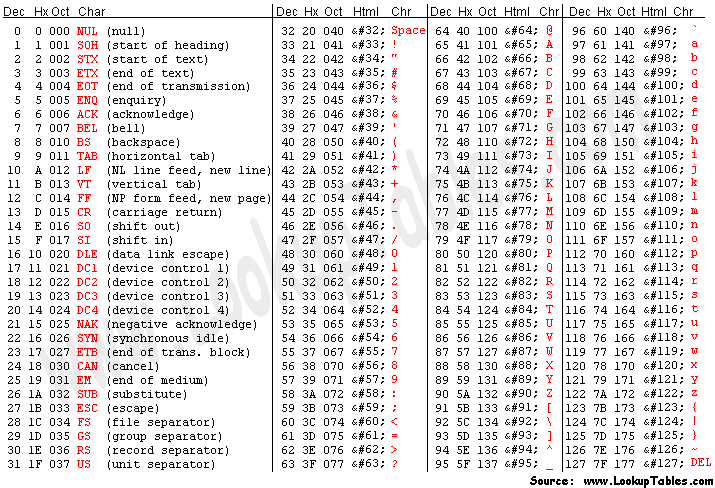


Ausserdem werden so Buchstaben wie bspw. Umlaute, die in der deutschen Sprache und geläufig sind von diesem ausgeschlossen, da sie sich im "extended Character Set" befinden. (https://www.ascii-codes.com/cp852.html)

Zudem ist zu bemerken, dass der Hash-Algorithmus nicht sonderlich Complex ist und ausserdem beinahe garantiert nicht die gänze seiner Kapazität ausnutzt und so in mehrerlei hinsicht praktisch ungeeignet für seine Funktion anzusehen ist.

Alternativ könnte bspw. `hashlib.sha256` utilisiert werden, um die beschriebenen Schwächen zu verbessern, wie in `HashTable.calculate_hash_value_sha256()` vorgeführt (Z. 198 ff.).

In [7]:
# Implemenation of a HashTable with chaining-meachanism using Nodes to store values of type string.

class Node():
    """
    For usage in LinkedList or HashTabel with chaining-mechanism.
    """

    def __init__(self, value):
        self.value = value
        self.pointer = None
        
    def __repr__(self):
        chain = str(self.value)
        current_pointer = self.pointer
        while current_pointer is not None:
            chain += " -> " + str(current_pointer.value)
            current_pointer = current_pointer.pointer
        return chain if self.pointer is not None else str(self.value)


class HashTable(): 

    """
    HashTable with chaining-mechanism using Nodes.

    Syntax: HashTable(size:int=10000) 
        size: size of the HashTable, default is 10000

    Available methods:
        store(string), lookup(string), calculate_hash_value(string), index(string), get_load_factor(), remove(string)

    Methods in implementation:
        rehash(), resize(), 
    """      

    def __init__(self, size:int=10000):
        self.table = [None]*size
        self.rehash_counter = 0
        self.size = size if self.rehash_counter == 0 else self.get_load_factor()
        

    def store(self, string:str):
        """
        Input a string that's stored in the table as a new Node.
        """
        if isinstance(string, str) is False:
            raise TypeError("Input must be of type string")
        if self.get_load_factor() > 0.75:
            self.rehash()
        hash_value = self.calculate_hash_value(string)
        if(hash_value >= len(self.table)):
            raise ValueError("Please rehash the table: Hash value {} for input is out of range (Current capacity: {}).".format(hash_value, len(self.table)))
        if self.get_load_factor() > 0.75:
            self.rehash()
        if not (self.table[hash_value] == None):
            self.__chain(string, self.table[hash_value])
        else:
            self.table[hash_value] = Node(string)
            
    def __chain(self, string:str, node:Node):
        """
        Helper method for self.store() if index is already containing a Node.
        New Value will be appended as a new node to the end of the chain.
        """
        if node.pointer == None:
            node.pointer = Node(string)
        else:
            self.__chain(string, node.pointer)

    def lookup(self, string:str):
        """
        Return the hash value if the string is already in the table.
        Return -1 otherwise.
        """
        hash_value = self.calculate_hash_value(string)
        if self.table[hash_value] is not None:
            if self.table[hash_value].value == string:
                return hash_value
            else:
                return self.__lookup_chain(string, self.table[hash_value])
        else:
            warnings.warn("'{}' not in table.".format(string))
            return -1
    
        
    def __lookup_chain(self, string:str, node:Node):
        """
        Helper method for self.lookup() if index is containing a chain
        """
        if node.pointer == None:
            warnings.warn("'{}' not in table.".format(string))
            return -1
        elif node.pointer.value == string:
            return self.calculate_hash_value(string)
        else:
            return self.__lookup_chain(string, node.pointer)


    def calculate_hash_value(self, string:str) -> int:
        """
        Helper function to calulate a hash value from a string.
        Hash value is calculated by adding the unicode values of the first two characters of the string.
        For the calculation all characters are converted to uppercase.
        """
        uni_string = ""
        for i in range(0, 2):
            try:
                uni_string += str(ord(string[i].upper()))
            except IndexError:
                pass
        return int(uni_string)
    
    
    ###########################################################
    ############# Exceeding the scope of this task: ###########
    ###########################################################

    def __repr__(self):

        result = []
        for i, node in enumerate(self.table):
            if node:
                result.append(f"{i}: {node}")
        return f"----- Begin of HashTable -----\n" + "\n".join(result) + "\n----- End of HashTable -------"
        
    
    def index(self, string:str):
        """
        Return the index of the string in the table if the string is already in the table.
        Raise ValueError otherwise.
        """
        hash_value = self.calculate_hash_value(string)
        node = self.table[hash_value]
        while node is not None and node.value != string:
            node = node.pointer
        if node is not None:
            return hash_value
        else:
            raise ValueError(f"{string} not found in hash table")

    def remove(self, string:str):
        """
        Removes a string from the HashTable.
        """
        hash_value = self.calculate_hash_value(string)
        if self.table[hash_value] is not None:
            if self.table[hash_value].value == string:
                self.table[hash_value] = self.table[hash_value].pointer
            else:
                self.__remove_chain(string, self.table[hash_value])
        else:
            return -1
    
    def __remove_chain(self, string:str, node:Node):
        """
        Helper method for self.remove() if index is containing a chain
        """
        if node.pointer == None:
            return -1
        elif node.pointer.value == string:
            node.pointer = node.pointer.pointer
        else:
            self.__remove_chain(string, node.pointer)

    def rehash(self, multiplier:int=2, addend:int=1):
        """
        Rehashes the HashTable with a new size of 2*old_size + 1.
        NoTE: Since it uses the old hashing funciton, only the loadfactor is minimalized 
        but the rehashing is not implemented.
        """
        old_size = len(self.table)
        new_size = multiplier*old_size + addend
        new_table = [None]*new_size
        for node in self.table:
            if node:
                self.__rehash_chain(node, new_table)
        self.table = new_table
        self.rehash_counter += 1

    def __rehash_chain(self, node:Node, new_table:list):
        """
        Helper method for self.rehash() if index is containing a chain
        """
        hash_value = self.calculate_hash_value(node.value) % len(new_table)
        if not (new_table[hash_value] == None):
            self.__chain(node.value, new_table[hash_value])
        else:
            new_table[hash_value] = Node(node.value)
        if node.pointer:
            self.__rehash_chain(node.pointer, new_table)
    
    def get_load_factor(self):
        """
        Returns the load factor of the HashTable
        """
        return sum([1 for node in self.table if node]) / len(self.table)
    
    def calculate_hash_value_sha256(self, string:str):
        """
        Calculates a hash value with the sha256 algorithm.
        """
        string = string.encode("utf-8")

        hash_object = hashlib.sha256() 
        hash_object.update(string)
        hash_bytes = hash_object.digest()
        
        hash_int = int.from_bytes(hash_bytes, byteorder="big")
        hash_value = hash_int % self.size
        return hash_value


In [9]:
# Setup
hash_table = HashTable()

# Test calculate_hash_value()
assert hash_table.calculate_hash_value('DHBW') == 6872


# Test lookup() edge case
##### Anmerkung: 
##### lookup() was expanded to also raise a warning if the Value (string) is not in the table. 
##### Also see below for implementation of index()
assert hash_table.lookup('DHBW') == -1

# Test store()
hash_table.store('DHBW')
assert hash_table.lookup('DHBW') == 6872
with pytest.raises(TypeError):
    hash_table.store(1234)
assert hash_table.calculate_hash_value("ÄÄ") == 196196
# Since the hash value is calculated by adding the unicode values of the first two characters 
# of the string, the "ÄÄ" will raise a ValueError.
# Illegal characters are: "Ä", "Ö", "Ü", "ä", "ö", "ü", "ß", "´", "` as they all are not in the ASCII table.
with pytest.raises(ValueError):
    hash_table.store('ÄÄ')


# Test store collisions
assert hash_table.calculate_hash_value('DH ist die Abkuerzung fuer das heisst') == hash_table.calculate_hash_value('DHBW')
hash_table.store('DH ist die Abkuerzung fuer das heisst')
assert hash_table.lookup('DH ist die Abkuerzung fuer das heisst') == 6872

values = ["0", "00", "001", "002", "99", "a", "A", "aa", "AA", "z", "Z", "zz", "ZZ", "dh wird normalerweise klein geschrieben", "DHBW Loerrach", "Algorithmen und Datenstrukturen", "Kilian Lorenz", "Jacob Ruhnau", "Max Bergau", "WDS22", "WWI22A", "WWI22B"]
for value in values:
    hash_table.store(value)

# Implementation of __repr__() for HashTable so that it can be printed
print(hash_table)


----- Begin of HashTable -----
48: 0
65: a -> A
90: z -> Z
4848: 00 -> 001 -> 002
5757: 99
6565: aa -> AA
6576: Algorithmen und Datenstrukturen
6872: DHBW -> DH ist die Abkuerzung fuer das heisst -> dh wird normalerweise klein geschrieben -> DHBW Loerrach
7465: Jacob Ruhnau
7573: Kilian Lorenz
7765: Max Bergau
8768: WDS22
8787: WWI22A -> WWI22B
9090: zz -> ZZ
----- End of HashTable -------


/var/folders/vm/zzdn9d7x7c1fc4csr6m5k6s00000gn/T/ipykernel_43650/2699780368.py:82: UserWarning: 'DHBW' not in table.
  warnings.warn("'{}' not in table.".format(string))


In [ ]:
############# Exceeding the scope of this task #############

# Another suitable option instead of HashTable.lookup() would be HashTable.index().
# Analog to list.index() it raises a ValueError if the Value (string) is not in the table.
with pytest.raises(ValueError):
    hash_table.index('Fr. Geitlinger')

for value in values:
    if hash_table.lookup(value) == -1:
        hash_table.store(value)

# Test remove()
hash_table.remove("dh wird normalerweise klein geschrieben")
with pytest.raises(ValueError):
    hash_table.index("dh wird normalerweise klein geschrieben")

# index() of course also works for chains.
assert hash_table.index("001") == 4848
hash_table.remove("001")
with pytest.raises(ValueError):
    hash_table.index("001")

print(hash_table)

### Aufgabe 4: Mengenoperationen

In [ ]:
# a) Folgende Methoden der set Klasse müssen durch Mengenoperatoren (siehe Folien) ersetzt werden
# [ 3 points]

s1_0 = {"b", "c"}.union({"c", "a"})
s1 = {"b", "c"} | {"c", "a"}

assert s1 == s1_0
print(s1)

s2_0 = {"b", "c"}.intersection({"c", "a"})
s2 = {"b", "c"} & {"c", "a"}

assert s2 == s2_0
print(s2)

s3_0 = {"b","c"}.difference({"c", "a"})
s3 = {"b","c"} - {"c", "a"}

assert s3 == s3_0
print(s3)

s4_0 = {"b","c"}.symmetric_difference({"c", "a"})
s4 = {"b","c"} ^ {"c", "a"}

assert s4 == s4_0 
print(s4)


In [ ]:
# b) Welche Variablennamen sind in Python gültig und welche nicht? Benutze Mengen 
# und Mengenoperationen, um das Ergebnis zu ermitteln 
# [ 3 points]

# Legal variable names:

variableNameCandidates = ('myvar','my_var','def','3myvar','myVar','MYVAR','my-var','myvar2','my var',' ','','1337','v@r')
legal_variables = set()

# This task is solved using the built-in functions isidentifier() and keyword.kwlist from the keyword module.
# Using keyword.kwlist first all keywords get filterd out.
# isidentifier() then checks if it is a valid variable name for which it needs to fullfill the following conditions:
#   - The first character must be a letter or an underscore
#   - The rest of the string (if any) must be a letter, a digit or an underscore
# Using this implementation, sadly we only got to perform a limited ammount of set-operations :(

potential_variables = set(variableNameCandidates) - set(keyword.kwlist)
for candidate in potential_variables:
    if candidate.isidentifier():
        legal_variables.add(candidate)

print("Legal variable names:")
print("\t-", "\n\t- ".join(list(legal_variables)))
